<a href="https://colab.research.google.com/github/Nicolasete007/Python/blob/master/examples/dreambooth/DreamBooth_Stable_Diffusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
!nvidia-smi

Tue Sep 27 22:06:12 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

https://github.com/ShivamShrirao/diffusers/tree/main/examples/dreambooth

## Install Requirements

In [8]:
!git clone https://github.com/ShivamShrirao/diffusers
!pip install git+https://github.com/ShivamShrirao/diffusers             # 2 times for now cause colab wasn't able to find it for some reason. Will fix later prolly.
%pip install git+https://github.com/facebookresearch/xformers@1d31a3a#egg=xformers
%pip install -U --pre triton
%pip install accelerate
%pip install transformers
%pip install ftfy
%pip install bitsandbytes

Cloning into 'diffusers'...
remote: Enumerating objects: 7107, done.
remote: Counting objects: 100% (49/49), done.
remote: Compressing objects: 100% (34/34), done.
remote: Total 7107 (delta 33), reused 25 (delta 15), pack-reused 7058
Receiving objects: 100% (7107/7107), 2.18 MiB | 26.24 MiB/s, done.
Resolving deltas: 100% (4646/4646), done.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/ShivamShrirao/diffusers to /tmp/pip-req-build-91icljpa
  Running command git clone -q https://github.com/ShivamShrirao/diffusers /tmp/pip-req-build-91icljpa
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/facebookresearch/xformers (to revision 1d31a3a) to /tmp/pip-install-r5ccizln/xformers_5c929f8136cf4f03b9123c3810e16aa4

### Install xformers from precompiled wheel. (These were compiled on Tesla T4, thanks to https://github.com/metrolobo)

In [9]:
%pip install https://github.com/metrolobo/xformers_wheels/releases/download/1d31a3ac/xformers-0.0.14.dev0-cp37-cp37m-linux_x86_64.whl

# if precompiled wheels don't work, install it with the following command. It will take around 40 minutes to compile.
# %pip install git+https://github.com/facebookresearch/xformers@1d31a3a#egg=xformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached https://github.com/metrolobo/xformers_wheels/releases/download/1d31a3ac/xformers-0.0.14.dev0-cp37-cp37m-linux_x86_64.whl (100.0 MB)


## Login to HF and run

In [10]:
%cd /content/diffusers/examples/dreambooth

/content/diffusers/examples/dreambooth


In [11]:
from huggingface_hub import notebook_login

notebook_login()

Login successful
Your token has been saved to /root/.huggingface/token
Authenticated through git-credential store but this isn't the helper defined on your machine.
You might have to re-authenticate when pushing to the Hugging Face Hub. Run the following command in your terminal in case you want to set this credential helper as the default

git config --global credential.helper store


In [12]:
CLASS_NAME = "guy"          # just a general name for class like dog for dog images.

In [13]:
MODEL_NAME = "CompVis/stable-diffusion-v1-4"
INSTANCE_DIR = "/content/data/sks"            # upload your images in this directory, you can use the file manager on the left panel to upload.
!mkdir -p $INSTANCE_DIR
CLASS_DIR = f"/content/data/{CLASS_NAME}"
OUTPUT_DIR = "/content/models/sks"

In [15]:
!accelerate launch train_dreambooth.py \
  --pretrained_model_name_or_path=$MODEL_NAME --use_auth_token \
  --instance_data_dir=$INSTANCE_DIR \
  --class_data_dir=$CLASS_DIR \
  --output_dir=$OUTPUT_DIR \
  --with_prior_preservation \
  --instance_prompt="nicoroyo" \
  --class_prompt="photo of a {CLASS_NAME}" \
  --resolution=512 \
  --use_8bit_adam \
  --train_batch_size=1 \
  --gradient_accumulation_steps=1 \
  --learning_rate=5e-6 \
  --lr_scheduler="constant" \
  --lr_warmup_steps=0 \
  --num_class_images=200 \
  --max_train_steps=1000

The following values were not passed to `accelerate launch` and had defaults used instead:
	`--num_processes` was set to a value of `1`
	`--num_machines` was set to a value of `1`
	`--mixed_precision` was set to a value of `'no'`
	`--num_cpu_threads_per_process` was set to `1` to improve out-of-box performance
To avoid this warning pass in values for each of the problematic parameters or run `accelerate config`.
Generating class images: 100% 49/49 [40:49<00:00, 49.99s/it]
Downloading: 100% 1.06M/1.06M [00:01<00:00, 733kB/s]
Downloading: 100% 525k/525k [00:01<00:00, 446kB/s]
Downloading: 100% 472/472 [00:00<00:00, 427kB/s]
Downloading: 100% 806/806 [00:00<00:00, 708kB/s]
Downloading: 100% 592/592 [00:00<00:00, 523kB/s]
Downloading: 100% 492M/492M [00:17<00:00, 28.8MB/s]

===================================BUG REPORT===================================
Welcome to bitsandbytes. For bug reports, please submit your error trace to: https://github.com/TimDettmers/bitsandbytes/issues
For effort

## Inference

In [16]:
import torch
from torch import autocast
from diffusers import StableDiffusionPipeline
from IPython.display import display

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


Moving 0 files to the new cache system


0it [00:00, ?it/s]

In [17]:
pipe = StableDiffusionPipeline.from_pretrained(OUTPUT_DIR, torch_dtype=torch.float16).to("cuda")

  0%|          | 0/51 [00:00<?, ?it/s]

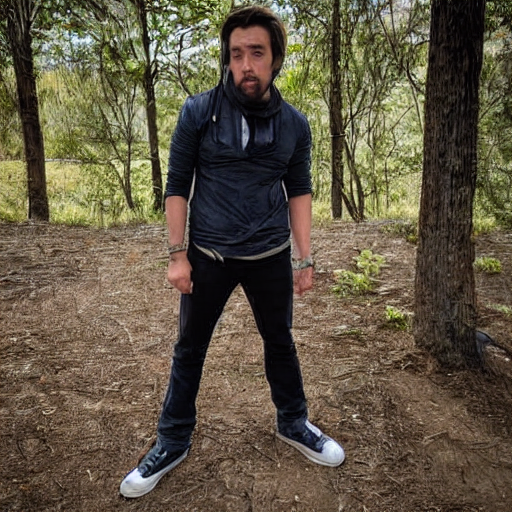

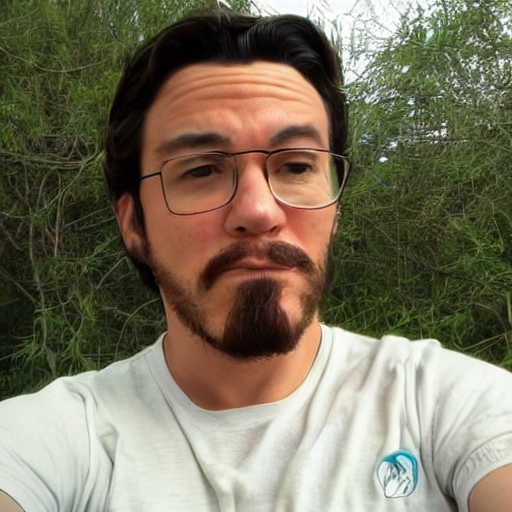

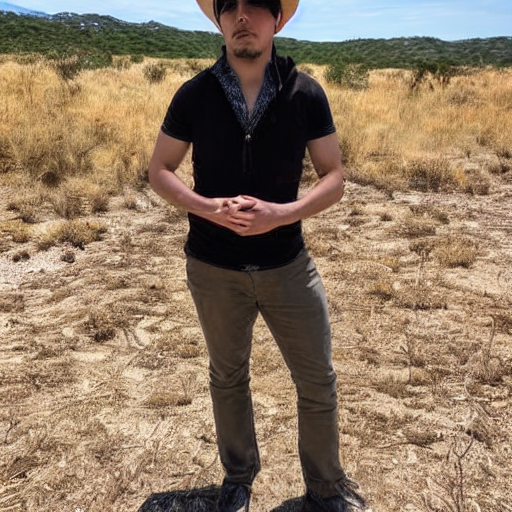

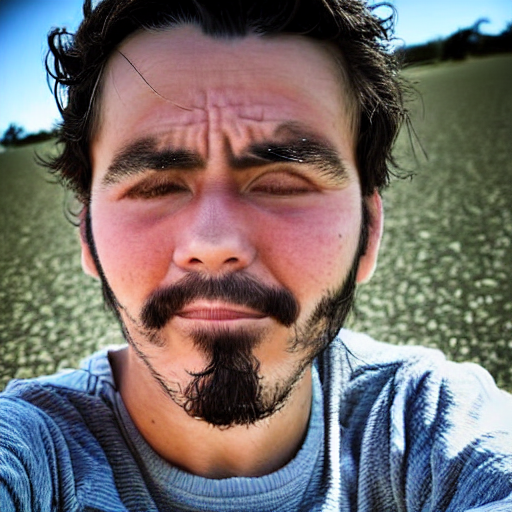

In [41]:
batch_size = 4
prompt = ["photo of a nicoroyo in the wild"] * batch_size

with autocast("cuda"):
    images = pipe(prompt, height=512, width=512, num_inference_steps=50, guidance_scale=7.5).images

for img in images:
    display(img)
